In [1]:
import tellurium as te
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## lac Operation Analysis

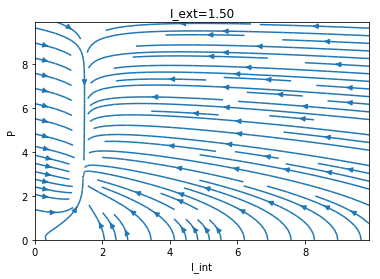

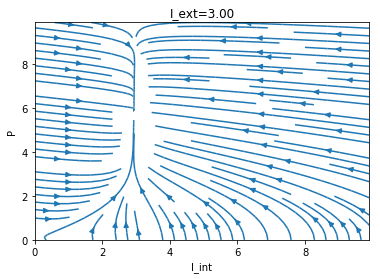

In [21]:
for i_ext in [1.5, 3.0]:
    plt.figure()
    a = 1; b = 0.1; c = 1; d = 0.5
    i_ints, ps = meshgrid(arange(0,10, 0.1), arange(0, 10, 0.1))
    i_int_dots = a*(i_ext - i_ints)*ps - b*i_ext
    p_dots = c*i_ints - d*ps
    streamplot(i_ints, ps, i_int_dots, p_dots)
    plt.xlabel("I_int")
    plt.ylabel("P")
    plt.title("I_ext=%2.2f" % i_ext)

## Derivative Analysis of a sine wave

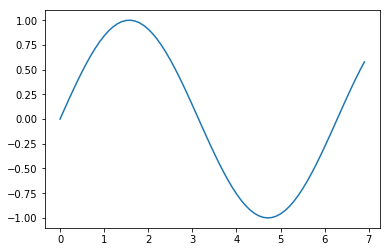

In [56]:
tvals = np.arange(0, 7, 0.1)
plt.plot(tvals, np.sin(tvals))

Text(0,0.5,'x(t)')

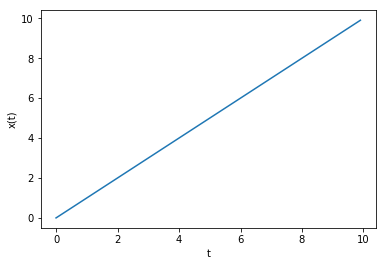

In [58]:
plt.plot(arange(0,10,0.1), arange(0,10,0.1))
plt.xlabel("t")
plt.ylabel("x(t)")

In [52]:
tvals

array([0.])

## Technical Models

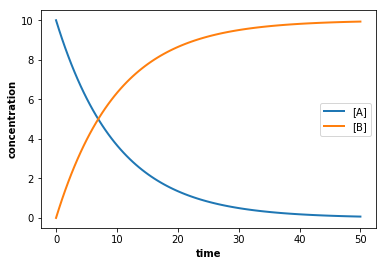

In [49]:
# Deterministic simulation
te.setDefaultPlottingEngine('matplotlib')

model = """
model test
    compartment C1;
    C1 = 1.0;
    species A, B;

    A = 10.0;
    B = 0.0;
    A in C1; B in C1;
    J1: A -> B; k1*A;

    k1 = 0.1;
end
"""
# load models
r = te.loada(model)
# simulate from 0 to 50 with 100 
r.simulate(0, 50, 100)
# plot the simulation
r.plot(xtitle="time", ytitle="concentration")

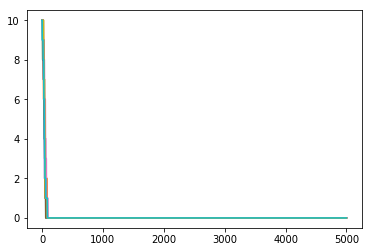

In [76]:
# Stochastic simulation
te.setDefaultPlottingEngine('matplotlib')

model = """
model test
    compartment C1;
    C1 = 1.0;
    species A, B;

    A = 10.0;
    B = 0.0;
    A in C1; B in C1;
    J1: A -> B; k1*A;

    k1 = 0.1;
end
"""
TIMES = 100
END_TIME = 50
r = te.loada(model)
r.integrator = 'gillespie'
r.integrator.seed = 1234
start_time = 0
conc_dict = {'A': [], 'B': []}
for instance in range(10):
    instance_dict = {'A': [], 'B': []}
    r.resetAll()
    for idx in range(END_TIME):
        for incr in range(TIMES):
            time_incr = incr/(1.0*TIMES)
            end_time = start_time + time_incr
            r.simulate(start_time, end_time)
            start_time = end_time
            concs = r.getFloatingSpeciesConcentrations()
            instance_dict['A'].append(concs[0])
            instance_dict['B'].append(concs[1])
    for key in ['A','B']:
        conc_dict[key].append(instance_dict[key])
        # plot the simulation
        #r.plot()
ys =np.array(conc_dict['A']).T
plt.plot(range(TIMES*END_TIME), ys)

array([[10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10.,  9.,  9., 10.],
       [10., 10.,  9., 10., 10., 10., 10.,  9.,  9., 10.],
       [10., 10.,  9., 10.,  9., 10., 10.,  9.,  9., 10.],
       [10., 10.,  9., 10.,  9., 10., 10.,  9.,  9., 10.],
       [10., 10.,  9., 10.,  9., 10., 10.,  9.,  9., 10.],
       [10., 10.,  9., 10.,  9., 10., 10.,  9.,  9., 10.],
       [10., 10.,  9.,  9.,  9., 10.,  9.,  9.,  9., 10.],
       [10., 10.,  9.,  9.,  9., 10.,  9.,  9.,  9., 10.],
       [ 9., 10.,  9.,  8.,  9.,  9.,  9.,  9.,  9., 10.],
       [ 9., 10.,  9.,  8.,  9.,  9.,  9.,  9.,  9., 10.],
       [ 9., 10.,  9.,  8.,  9.,  8.,  9.,  9.,  9., 10.],
       [ 9., 10.,  9.,  7.,  9.,  8.,  9.,  8.,  9., 10.],
       [ 9.,  9.,  9.,  7.,  9.,  8.,  9.,  8.,  9., 10.],
       [ 9.,  9.,  9.,  7.,  9.,  8.,  9.,  8.,  8., 10.],
       [ 9.,  9.,  8.,  6.,  9.,  8.,  9.,  8.,  8.,  8.],
       [ 9.,  9.,  8.,  6.,  8.,  7.,  8.,  7.,  8.,  8.